# Models Building in Sports - Part 1

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


%load_ext autoreload
%autoreload 2
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
pd.set_option("max_colwidth", 101)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Case Study - Locate the "zones" of a tennis court

For this we cluster x/y positions.

In [36]:
import courtvisionpython as cvp

Let's create a tennis court quickly

(<Figure size 792x432 with 1 Axes>, <AxesSubplot:>)

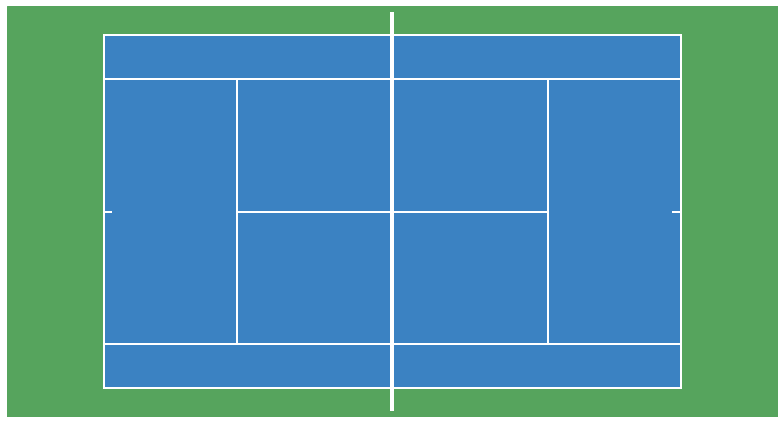

In [37]:
cvp.court()

In [24]:
# cvp.utils.get_match(year=2021, matchid="all", event="rg", return_single_dict=False)

In [38]:
# Reading it in:
filename = os.path.join("courtvision_data","australian_open","2021","2021-MS403-ao.json")

In [39]:
match = cvp.read_match(filename)

In [40]:
def norm(val):
    if val <=0:
        val = val * -1
    return val

In [42]:
points_data = match.points_data

bounces = points_data.copy().loc[ (points_data["position"]=="bounce") & (points_data["pointEndType"]!="Ace") & (points_data["pointEndType"]!="Faulty Serve") ]
bounces["x"] = bounces["x"].apply(lambda x: norm(x))

In [45]:
bounces.head()

,cruciality,returnPlacement,errorType,winnerPlacement,unforcedErrorPlacement,serverId,scorerId,receiverId,ballSpeed,returnSpeed,returnSpeedFrench,rallyLength,maxRally,spin,heightAboveNet,ballSpeedFrench,heightAboveNetFrench,distanceOutsideCourt,distanceOutsideCourtFrench,pointEndType,strokeType,serveType,court,setNumber,set,game,point,serve,hand,breakPoint,runAroundForeHand,breakPointConverted,trappedByNet,serverCordinate,receiverCordinate,id,pointNumber,x,y,z,position,order
pointId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1_4_5_2,false,2.8502,NA,NA,Net Error,ATPD875,ATPTB69,ATPTB69,159 KPH,NA,NA,4,5,2646,1.39 Feet,159 KPH,0.42 Metre,NA,NA,Unforced Error,Ground,Slice,DeuceCourt,1,1,4,5,2,BackHand,True,False,True,True,"{'x': 14.146, 'y': -1.292, 'z': 0.0, 'erroneousBall': False}","{'x': -14.124, 'y': -1.482, 'z': 0.0, 'erroneousBall': False}",1,0,4.450,-0.765,0.033,bounce,3
1_4_5_2,false,2.8502,NA,NA,Net Error,ATPD875,ATPTB69,ATPTB69,159 KPH,NA,NA,4,5,2646,1.39 Feet,159 KPH,0.42 Metre,NA,NA,Unforced Error,Ground,Slice,DeuceCourt,1,1,4,5,2,BackHand,True,False,True,True,"{'x': 14.146, 'y': -1.292, 'z': 0.0, 'erroneousBall': False}","{'x': -14.124, 'y': -1.482, 'z': 0.0, 'erroneousBall': False}",1,0,6.546,-0.343,0.035,bounce,8
1_4_5_2,false,2.8502,NA,NA,Net Error,ATPD875,ATPTB69,ATPTB69,159 KPH,NA,NA,4,5,2646,1.39 Feet,159 KPH,0.42 Metre,NA,NA,Unforced Error,Ground,Slice,DeuceCourt,1,1,4,5,2,BackHand,True,False,True,True,"{'x': 14.146, 'y': -1.292, 'z': 0.0, 'erroneousBall': False}","{'x': -14.124, 'y': -1.482, 'z': 0.0, 'erroneousBall': False}",1,0,5.139,-2.255,0.032,bounce,13
1_4_5_2,false,2.8502,NA,NA,Net Error,ATPD875,ATPTB69,ATPTB69,159 KPH,NA,NA,4,5,2646,1.39 Feet,159 KPH,0.42 Metre,NA,NA,Unforced Error,Ground,Slice,DeuceCourt,1,1,4,5,2,BackHand,True,False,True,True,"{'x': 14.146, 'y': -1.292, 'z': 0.0, 'erroneousBall': False}","{'x': -14.124, 'y': -1.482, 'z': 0.0, 'erroneousBall': False}",1,0,11.259,-2.004,0.031,bounce,18
2_4_6_1,false,4.54575,NA,Down the Line,NA,ATPD875,ATPTB69,ATPTB69,187 KPH,NA,NA,14,14,NA,3.74 Feet,187 KPH,1.14 Metre,NA,NA,Winner,Ground,Slice,AdCourt,2,2,4,6,1,ForeHand,True,False,True,False,"{'x': -14.938, 'y': 2.787, 'z': 0.0, 'erroneousBall': False}","{'x': 0.0, 'y': 0.0, 'z': 0.0, 'erroneousBall': False}",2,0,5.684,-0.713,0.034,bounce,2


In [46]:
x_y_bounces = bounces[["x","y"]].to_numpy()

### K-means

<Figure size 432x288 with 0 Axes>

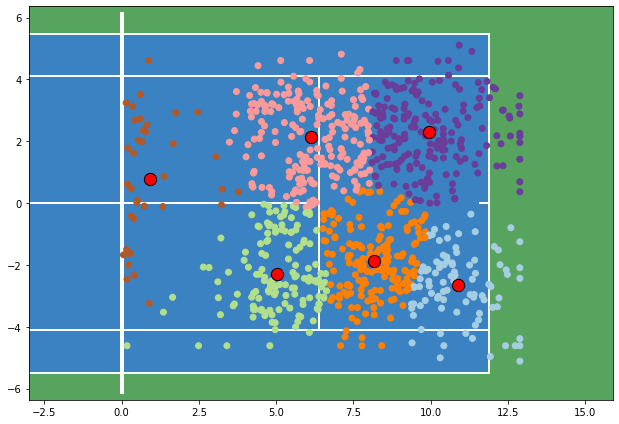

In [50]:
plt.set_cmap('Paired')

fig, ax = cvp.court(surface_color="#56A45D", line_color="white", court_color="#3B82C2", axis=True,equal_aspect=True, aspect="half")

random_state = 170
y_pred = KMeans(n_clusters=6, random_state=random_state).fit(x_y_bounces)

labels = y_pred.labels_
cluster_centers = y_pred.cluster_centers_

ax.scatter(x_y_bounces[:, 0], x_y_bounces[:, 1], c=labels, zorder=10)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="o", c="red",s=150, ec="black", zorder=10)

plt.show()

We can also use th elbow method to determine the ideal number of clusters, according to their inertia:
"Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided."

Text(0.5, 1.0, 'Elbow curve')

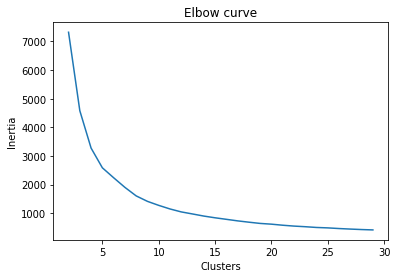

In [56]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_y_bounces)
    distorsions.append(kmeans.inertia_)

fig = plt.figure()
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.plot(range(2, 30), distorsions)
plt.title('Elbow curve')

### Heirachical Clustering

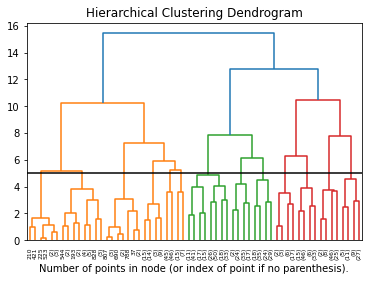

<Figure size 432x288 with 0 Axes>

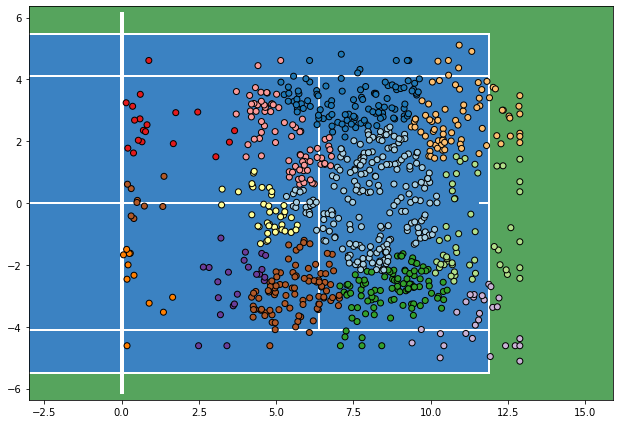

In [57]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
d_threshold = 5
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=d_threshold, n_clusters=None,linkage="complete")

model = model.fit(x_y_bounces)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.hlines(d_threshold,0,1000,color="k")
plt.show()

plt.set_cmap('Paired')

fig, ax = cvp.court(surface_color="#56A45D", line_color="white", court_color="#3B82C2", axis=True,equal_aspect=True, aspect="half")
ax.scatter(x_y_bounces[:, 0], x_y_bounces[:, 1], c=model.labels_,zorder=10,ec="black")

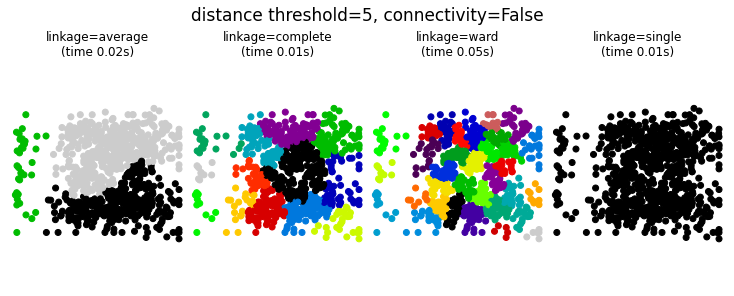

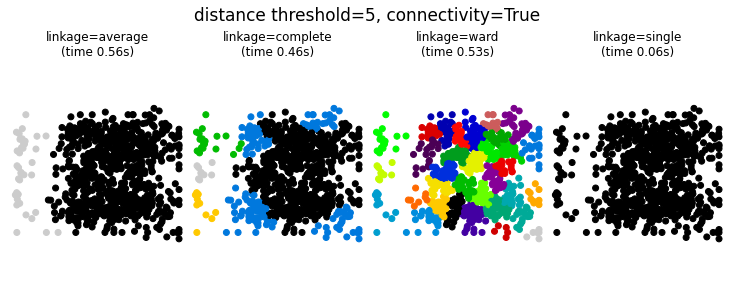

In [58]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

X = x_y_bounces

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 200, include_self=True)

knn_graph

for connectivity in (None, knn_graph):
    for d_threshold in (5,):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            distance_threshold=d_threshold,
                                            affinity='euclidean',
                                            n_clusters=None)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.8, wspace=0,
                                left=0, right=1)
            plt.suptitle('distance threshold=%i, connectivity=%r' %
                         (d_threshold, connectivity is not None), size=17)


plt.show()